# Fitting and Overfitting 

### The purpose of this exercise is to examine how improvements to training model can lead to overfitting, a situation that occurs when the model performs poorly once new, unseen data is introduced. 

## Data Acquisition and Processing

In [1]:
#%% import packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#%% Set seed for reproducible results
np.random.seed(414)

In [3]:
#%% Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

In [4]:
#%% split into training and testing datasets
train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

In [5]:
#%% create quadratic and cubic terms
train_df['X-squared'] = (train_df['X'])**2
train_df['X-cubed'] = (train_df['X'])**3

test_df['X-squared'] = (test_df['X'])**2
test_df['X-cubed'] = (test_df['X'])**3

In [6]:
#%% reshape data
testX = test_df['X'].reshape((300,1))
testy = test_df['y'].reshape((300,1))

X = train_df['X'].reshape((700,1))
y = train_df['y'].reshape((700,1))

In [7]:
#%% model1
m1_train_X = train_df['X'].reshape((700,1))
m1_test_X = test_df['X'].reshape((300,1))

m1 = linear_model.LinearRegression()
r1 = m1.fit(m1_train_X, y)
print(r1.intercept_, r1.coef_)

m1_pred_train = m1.predict(m1_train_X)
m1_pred_test = m1.predict(m1_test_X)

train_m1_mse = print(round(float(mean_squared_error(y, m1_pred_train)), 2))
test_m1_mse = print(round(float(mean_squared_error(testy, m1_pred_test)), 2))

[ 1.99591641] [[ 0.88959869]]
4.06
6.55


In [8]:
#%% model2
m2_train_X = train_df[['X', 'X-squared']]
m2_test_X = test_df[['X', 'X-squared']]

m2 = linear_model.LinearRegression()
r2 = m2.fit(m2_train_X, y)
print(r2.intercept_, r2.coef_)

m2_pred_train = m2.predict(m2_train_X)
m2_pred_test = m2.predict(m2_test_X)

train_m2_mse = print(round(float(mean_squared_error(y, m2_pred_train)), 2))
test_m2_mse = print(round(float(mean_squared_error(testy, m2_pred_test)), 2))

[ 3.14580289] [[ 0.23129691  0.06272232]]
3.79
7.99


In [9]:
#%% model 3
m3_train_X = train_df[['X', 'X-squared', 'X-cubed']]
m3_test_X = test_df[['X', 'X-squared', 'X-cubed']]

m3 = linear_model.LinearRegression()
r3 = m3.fit(m3_train_X, y)
print(r3.intercept_, r3.coef_)

m3_pred_train = m3.predict(m3_train_X)
m3_pred_test = m3.predict(m3_test_X)

train_m3_mse = print(round(float(mean_squared_error(y, m3_pred_train)), 2))
test_m3_mse = print(round(float(mean_squared_error(testy, m3_pred_test)), 2))

[ 5.40493337] [[-2.36094361  0.6806289  -0.039249  ]]
3.05
199.65


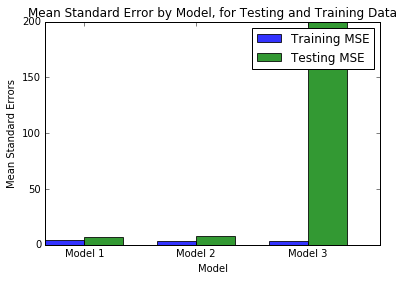

In [10]:
n_groups = 3
mse_train = (4.06, 3.79, 3.05)
mse_test = (6.55, 7.99, 199.65)
bar_width = 0.35
opacity = 0.8

fig, ax = plt.subplots()
index = np.arange(n_groups)

rects1 = plt.bar(index, mse_train, bar_width, alpha=opacity, color='b', label='Training MSE')

rects2 = plt.bar(index + bar_width, mse_test, bar_width, alpha=opacity, color='g', label='Testing MSE')

plt.xlabel('Model')
plt.ylabel('Mean Standard Errors')
plt.title('Mean Standard Error by Model, for Testing and Training Data')
plt.xticks(index + bar_width, ('Model 1', 'Model 2', 'Model 3'))
plt.legend()

plt.show()

### The plot shows that as each term is added to the model, the mean squared error decreases among the training data. This means that the increased terms are better fitting the true underlying distribution. However, the mean squared error increases among the testing data, which is an indication that we are overfitting. This suggests that the additional terms could just be capturing noise in the data.